In [1]:
import torch

In [2]:
gamma = 1
threshold = 1e-10

In [4]:
capital_max = 100
n_state = capital_max + 1

In [6]:
rewards = torch.zeros(n_state)
rewards[-1] = 1

In [9]:
head_prob = 0.4

In [10]:
env = {'capital_max':capital_max,
      'head_prob': head_prob,
      'rewards': rewards,
      'n_state': n_state}

In [19]:
def value_iteration(env, gamma, threshold):
    head_prob = env['head_prob']
    n_state = env['n_state']
    capital_max = env['capital_max']
    V = torch.zeros(n_state)
    
    while True:
        V_temp = torch.zeros(n_state)
        for state in range (1, capital_max):
            v_actions = torch.zeros(min(state, capital_max-state) + 1)
            
            for action in range (1, min(state, capital_max-state)+1):
                v_actions[action] += head_prob * (rewards[state+action] + gamma * V[state+action])
                v_actions[action] += (1-head_prob) * (rewards[state-action] + gamma * V[state-action])
            V_temp[state] = torch.max(v_actions)
        max_delta = torch.max(torch.abs(V-V_temp))
        
        V = V_temp.clone()
        
        if max_delta <= threshold:
            break
    return V

In [24]:
def extract_optimal_policy(env, V_optimal, gamma):
    head_prob = env['head_prob']
    n_state = env['n_state']
    capital_max = env['capital_max']
    optimal_policy = torch.zeros(capital_max).int()
    
    for state in range (1, capital_max):
        v_actions = torch.zeros(n_state)
        for action in range (1, min(state, capital_max-state)+1):
            v_actions[action] += head_prob * (rewards[state+action] + gamma * V_optimal[state+action])
            v_actions[action] += (1-head_prob) * (rewards[state-action] + gamma * V_optimal[state-action])
        optimal_policy[state] = torch.argmax(v_actions)
    return optimal_policy

In [16]:
import time


In [27]:
start_time = time.time()
V_optimal = value_iteration(env, gamma, threshold)
optimal_policy = extract_optimal_policy (env, V_optimal, gamma)
print ('Total time is: {:.3f}sec'.format(time.time() - start_time))

Total time is: 2.580sec


In [31]:
print ('Optimal Value:\n{}'.format(V_optimal))

Optimal Value:
tensor([0.0000, 0.0021, 0.0052, 0.0092, 0.0129, 0.0174, 0.0231, 0.0278, 0.0323,
        0.0377, 0.0435, 0.0504, 0.0577, 0.0652, 0.0695, 0.0744, 0.0807, 0.0866,
        0.0942, 0.1031, 0.1087, 0.1160, 0.1259, 0.1336, 0.1441, 0.1600, 0.1631,
        0.1677, 0.1738, 0.1794, 0.1861, 0.1946, 0.2017, 0.2084, 0.2165, 0.2252,
        0.2355, 0.2465, 0.2579, 0.2643, 0.2716, 0.2810, 0.2899, 0.3013, 0.3147,
        0.3230, 0.3339, 0.3488, 0.3604, 0.3762, 0.4000, 0.4031, 0.4077, 0.4138,
        0.4194, 0.4261, 0.4346, 0.4417, 0.4484, 0.4565, 0.4652, 0.4755, 0.4865,
        0.4979, 0.5043, 0.5116, 0.5210, 0.5299, 0.5413, 0.5547, 0.5630, 0.5740,
        0.5888, 0.6004, 0.6162, 0.6400, 0.6446, 0.6516, 0.6608, 0.6690, 0.6791,
        0.6919, 0.7026, 0.7126, 0.7248, 0.7378, 0.7533, 0.7697, 0.7868, 0.7965,
        0.8075, 0.8215, 0.8349, 0.8520, 0.8721, 0.8845, 0.9009, 0.9232, 0.9406,
        0.9643, 0.0000])


In [25]:
optimal_policy = extract_optimal_policy (env, V_optimal, gamma)

In [33]:
print ('Optimal Policy:\n{}'.format(optimal_policy))

Optimal Policy:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  9, 17,
        18,  6,  5, 21,  3,  2,  1, 25,  1,  2,  3, 29,  5,  6,  7,  8,  9, 35,
        36, 12, 12, 11, 10,  9,  8,  7, 44,  5,  4,  3,  2,  1, 50,  1,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11, 12, 12, 11, 10,  9,  8,  7,  6,  5,  4,
         3,  2,  1, 25,  1,  2,  3, 21,  5, 19,  7,  8, 16, 15, 14, 12, 12, 11,
        10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=torch.int32)


In [34]:
import matplotlib.pyplot as plt

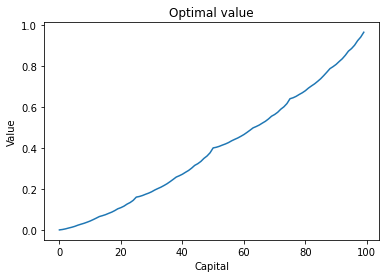

In [35]:
plt.plot(V_optimal[:100].numpy())
plt.title('Optimal value')
plt.xlabel('Capital')
plt.ylabel('Value')
plt.show()


In [67]:
def policy_evaluation(env, policy, gamma, threshold):
    head_prob = env['head_prob']
    n_state = env['n_state']
    capital_max = env['capital_max']
    V = torch.zeros(n_state)
    
    while True:
        V_temp = torch.zeros(n_state)
        for state in range (1, capital_max):
            action = policy[state].item()
            V_temp[state] += head_prob * (rewards[state+action] + gamma * V[state+action])
            V_temp[state] += (1-head_prob) * (rewards[state-action] + gamma * V[state-action])
        
        max_delta = torch.max(torch.abs(V-V_temp))
        
        V = V_temp.clone()
        
        if max_delta <= threshold:
            break
    return V

In [69]:
def policy_improvement (env, V, gamma):
    head_prob = env['head_prob']
    n_state = env['n_state']
    capital_max = env['capital_max']
    policy = torch.zeros(n_state).int()
    
    for state in range (1, capital_max):
            v_actions = torch.zeros(min(state, capital_max-state) + 1)
            
            for action in range (1, min(state, capital_max-state)+1):
                v_actions[action] += head_prob * (rewards[state+action] + gamma * V[state+action])
                v_actions[action] += (1-head_prob) * (rewards[state-action] + gamma * V[state-action])
            policy[state] = torch.argmax(v_actions)
    return policy

In [70]:
def policy_iteration(env, gamma, threshold):
    n_state = env['n_state']
    policy = torch.zeros(n_state).int()
    
    while True:
        V = policy_evaluation(env, policy, gamma, threshold)
        policy_improved = policy_improvement(env, V, gamma)
        if torch.equal(policy_improved, policy):
            return V, policy_improved
    
        policy = policy_improved

In [71]:
start_time = time.time()
V_optimal,optimal_policy = policy_iteration(env, gamma, threshold)

print ('Total time is: {:.3f}sec'.format(time.time() - start_time))

Total time is: 2.471sec


In [72]:
print ('Optimal Value:\n{}'.format(V_optimal))
print ('Optimal Policy:\n{}'.format(optimal_policy))

Optimal Value:
tensor([0.0000, 0.0021, 0.0052, 0.0092, 0.0129, 0.0174, 0.0231, 0.0278, 0.0323,
        0.0377, 0.0435, 0.0504, 0.0577, 0.0652, 0.0695, 0.0744, 0.0807, 0.0866,
        0.0942, 0.1031, 0.1087, 0.1160, 0.1259, 0.1336, 0.1441, 0.1600, 0.1631,
        0.1677, 0.1738, 0.1794, 0.1861, 0.1946, 0.2017, 0.2084, 0.2165, 0.2252,
        0.2355, 0.2465, 0.2579, 0.2643, 0.2716, 0.2810, 0.2899, 0.3013, 0.3147,
        0.3230, 0.3339, 0.3488, 0.3604, 0.3762, 0.4000, 0.4031, 0.4077, 0.4138,
        0.4194, 0.4261, 0.4346, 0.4417, 0.4484, 0.4565, 0.4652, 0.4755, 0.4865,
        0.4979, 0.5043, 0.5116, 0.5210, 0.5299, 0.5413, 0.5547, 0.5630, 0.5740,
        0.5888, 0.6004, 0.6162, 0.6400, 0.6446, 0.6516, 0.6608, 0.6690, 0.6791,
        0.6919, 0.7026, 0.7126, 0.7248, 0.7378, 0.7533, 0.7697, 0.7868, 0.7965,
        0.8075, 0.8215, 0.8349, 0.8520, 0.8721, 0.8845, 0.9009, 0.9232, 0.9406,
        0.9643, 0.0000])
Optimal Policy:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 